In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load dataset from Google Drive
file_path = "/content/drive/My Drive/UCI_Credit_Card.csv"
data = pd.read_csv(file_path)

# Display first 5 rows
print(data.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

In [ ]:
# Get dataset information
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
# Drop first column ("ID") as it's just a unique identifier
data = data.drop(columns=["ID"])

# Rename target variable for clarity
data = data.rename(columns={"default.payment.next.month": "Default"})

# Convert categorical variables to numerical
categorical_cols = ["SEX", "EDUCATION", "MARRIAGE"]
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Check updated dataset
print(data.head())


   LIMIT_BAL  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
0    20000.0   24      2      2     -1     -1     -2     -2     3913.0   
1   120000.0   26     -1      2      0      0      0      2     2682.0   
2    90000.0   34      0      0      0      0      0      0    29239.0   
3    50000.0   37      0      0      0      0      0      0    46990.0   
4    50000.0   57     -1      0     -1      0      0      0     8617.0   

   BILL_AMT2  ...  SEX_2  EDUCATION_1  EDUCATION_2  EDUCATION_3  EDUCATION_4  \
0     3102.0  ...   True        False         True        False        False   
1     1725.0  ...   True        False         True        False        False   
2    14027.0  ...   True        False         True        False        False   
3    48233.0  ...   True        False         True        False        False   
4     5670.0  ...  False        False         True        False        False   

   EDUCATION_5  EDUCATION_6  MARRIAGE_1  MARRIAGE_2  MARRIAGE_3  
0       

In [ ]:
# Define features (X) and target (y)
X = data.drop("Default", axis=1)
y = data["Default"]

# Print dataset shape
print(f"Features Shape: {X.shape}")
print(f"Target Shape: {y.shape}")


Features Shape: (30000, 30)
Target Shape: (30000,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 21000
Testing samples: 9000


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform training data
X_train = scaler.fit_transform(X_train)

# Transform test data
X_test = scaler.transform(X_test)


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Print new class distribution
print(y_train_smote.value_counts())


Default
0    16355
1    16355
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],  # Regularization strength
    "solver": ["lbfgs", "liblinear"],  # Optimization algorithm
}

# Perform grid search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_smote, y_train_smote)

# Get best parameters
print("Best Parameters:", grid_search.best_params_)

# Train model with best parameters
log_reg = LogisticRegression(**grid_search.best_params_)
log_reg.fit(X_train_smote, y_train_smote)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameters: {'C': 0.1, 'solver': 'liblinear'}


LogisticRegression(C=0.1, solver='liblinear')

In [ ]:
# Predict on test data
y_pred = log_reg.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.67
Confusion Matrix:
[[4712 2297]
 [ 702 1289]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.67      0.76      7009
           1       0.36      0.65      0.46      1991

    accuracy                           0.67      9000
   macro avg       0.61      0.66      0.61      9000
weighted avg       0.76      0.67      0.69      9000



In [ ]:
from xgboost import XGBClassifier

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:00:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8018888888888889


In [ ]:
precision = precision_score(y_test, y_pred_xgb, average="weighted", zero_division=1)
recall = recall_score(y_test, y_pred_xgb, average="weighted", zero_division=1)
f1 = f1_score(y_test, y_pred_xgb, average="weighted", zero_division=1)


In [ ]:
print("\nModel Performance Comparison:")
print("-" * 40)
print(f"{'Metric':<15}{'Logistic Regression':<20}{'XGBoost'}")
print("-" * 40)
print(f"{'Accuracy':<15}{accuracy_score(y_test, y_pred):<20.4f}{accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"{'Precision':<15}{precision_score(y_test, y_pred, average='weighted'):<20.4f}{precision:.4f}")
print(f"{'Recall':<15}{recall_score(y_test, y_pred, average='weighted'):<20.4f}{recall:.4f}")
print(f"{'F1-Score':<15}{f1_score(y_test, y_pred, average='weighted'):<20.4f}{f1:.4f}")



Model Performance Comparison:
----------------------------------------
Metric         Logistic Regression XGBoost
----------------------------------------
Accuracy       0.6668              0.8019
Precision      0.7573              0.7859
Recall         0.6668              0.8019
F1-Score       0.6930              0.7906


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


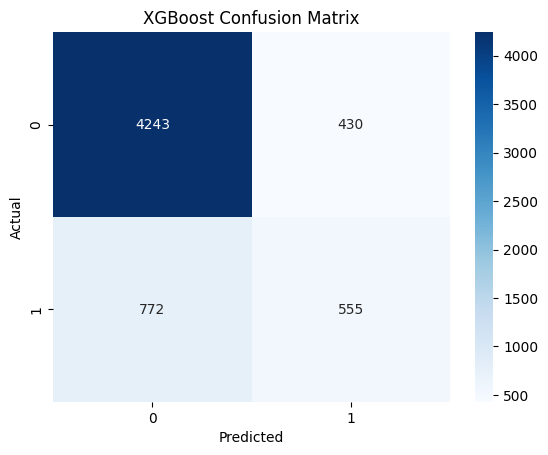

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()
